In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("../02082023_2000000_aquire20_maxInv200_epsilon0Point05_singlePolicy.json")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
trajectory,"[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to...","[{'S': {'food': -1, 'water': -1, 'min_steps_to..."
times,"[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
positions,"[{'x': 16, 'y': 14}, {'x': 16, 'y': 16}, {'x':...","[{'x': 11, 'y': 14}, {'x': 10, 'y': 15}, {'x':...","[{'x': 16, 'y': 2}, {'x': 16, 'y': 4}, {'x': 1...","[{'x': 12, 'y': 12}, {'x': 12, 'y': 12}, {'x':...","[{'x': 16, 'y': 5}, {'x': 14, 'y': 5}, {'x': 1...","[{'x': 3, 'y': 15}, {'x': 5, 'y': 12}, {'x': 5...","[{'x': 2, 'y': 5}, {'x': 3, 'y': 5}, {'x': 5, ...","[{'x': 14, 'y': 16}, {'x': 16, 'y': 15}, {'x':...","[{'x': 13, 'y': 15}, {'x': 14, 'y': 15}, {'x':...","[{'x': 12, 'y': 19}, {'x': 14, 'y': 18}, {'x':...","[{'x': 16, 'y': 19}, {'x': 14, 'y': 18}, {'x':...","[{'x': 6, 'y': 4}, {'x': 5, 'y': 4}, {'x': 7, ...","[{'x': 2, 'y': 3}, {'x': 4, 'y': 4}, {'x': 5, ...","[{'x': 19, 'y': 19}, {'x': 18, 'y': 19}, {'x':...","[{'x': 4, 'y': 1}, {'x': 5, 'y': 2}, {'x': 5, ...","[{'x': 8, 'y': 9}, {'x': 10, 'y': 10}, {'x': 9...","[{'x': 13, 'y': 9}, {'x': 12, 'y': 7}, {'x': 1...","[{'x': 4, 'y': 18}, {'x': 5, 'y': 16}, {'x': 5...","[{'x': 19, 'y': 5}, {'x': 14, 'y': 5}, {'x': 1...","[{'x': 8, 'y': 11}, {'x': 10, 'y': 6}, {'x': 8..."
trades,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, N

In [3]:
# df_raw.melt(ignore_index=False).explode(column=['value'])
df = df.transpose().reset_index(names='agent_id').drop(columns=['agent_state_items','agent_state_item_levels']).explode(column=['trajectory','times','positions','trades'])

In [17]:
df.head()

,agent_id,trajectory,times,positions,trades
0,0,"{'S': {'food': -1, 'water': -1, 'min_steps_to_...",0,"{'x': 16, 'y': 14}",None
0,0,"{'S': {'food': 89, 'water': -11, 'min_steps_to...",10,"{'x': 16, 'y': 16}",None
0,0,"{'S': {'food': 179, 'water': -21, 'min_steps_t...",20,"{'x': 16, 'y': 16}",None
0,0,"{'S': {'food': 197, 'water': -31, 'min_steps_t...",30,"{'x': 14, 'y': 16}",None
0,0,"{'S': {'food': 192, 'water': -41, 'min_steps_t...",40,"{'x': 15, 'y': 14}",None


In [37]:
# for trade in df['trades']:
#     if trade != None:
#         print(trade)

df['trades_bin'] = df['trades'].map(lambda x: 0 if x == None else 1)

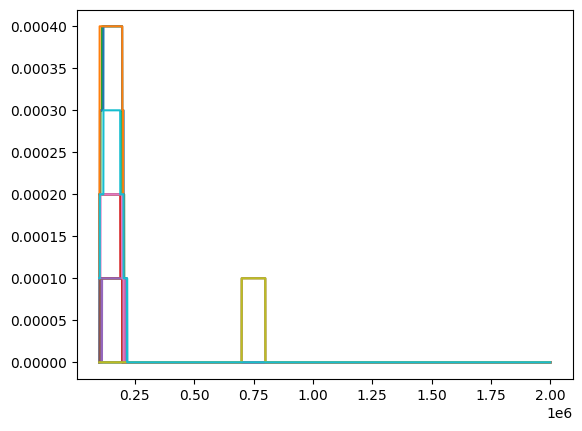

In [56]:
for id in range(20):
    plt.plot(df.loc[df['agent_id'] == id]['times'],df.loc[df['agent_id'] == id]['trades_bin'].rolling(window=10000).mean())